In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Makes utils module visible
# Note - this is probably bad practice, but will work with this at the moment
import sys
sys.path.append('../')

In [3]:
import csv
import pandas as pd
import numpy as np

from utils.utils import *

For now, just decimate the files, will store into dictionary later

In [5]:
das_dir = r'F:\enel-data\short-exp-march-2024\das\recording_2024-03-07T12_17_20-0600'
# batch_decim_to_100(das_dir)
# concatenate_and_save_h5(directory_to_file=das_dir,
#                         output_filename='full')

In [4]:
das_dir = r'F:\enel-data\short-exp-march-2024\das\recording_2024-03-05T11_39_59-0600'
input_file_name = 'sensor_2024-03-05T114001-0600_decimated100hz'


strain,time= load_decim_data(directory_to_file=das_dir, input_file_name=input_file_name)

In [5]:
print(np.shape(strain))

(795, 60000)


In [ ]:
das_dir = r'F:\enel-data\short-exp-march-2024\das\recording_2024-03-07T10_28_58-0600'
batch_decim_to_100(das_dir)
concatenate_and_save_h5(directory_to_file=das_dir,
                        output_filename='full')

Cut up the decimated files

In [6]:
das_dir = r'F:\enel-data\short-exp-march-2024\das\recording_2024-03-07T12_56_48-0600'
input_file_name = 'sensor_2024-03-07T125650-0600full'
output_file_name = 'idle-bc3'

test = clean_das_files_odh4(directory_to_file=das_dir,
                     input_file_name=input_file_name,
                     output_file_name=output_file_name,
                     target_time=['2024-03-07 18:57:00', '2024-03-07 19:19:10'])

In [23]:
das_dir = r'F:\enel-data\short-exp-march-2024\das\recording_2024-03-07T14_33_15-0600'
input_file_name = 'sensor_2024-03-07T143316-0600full'
output_file_name = 'idle-bc4'

test = clean_das_files_odh4(directory_to_file=das_dir,
                     input_file_name=input_file_name,
                     output_file_name=output_file_name,
                     target_time=['2024-03-07 20:33:00', '2024-03-07 20:56:40'])

Now to filter datasets

In [31]:
das_dir = r'F:\enel-data\short-exp-march-2024\das\cut-data'
input_file_name = 'brake-bc1'

filter_das_data(directory_to_file=das_dir,
                input_file_name=input_file_name,
                cutoff_freq=0.1,
                order=2)

..\utils\utils.py:402: UserWarning: Time intervals are not uniform.
  warnings.warn('Time intervals are not uniform.', UserWarning)


100.0


Get the min and max strain envelopes (NOTE: don't take the min and max from the raw output, can be misleading)

In [32]:
das_dir = r'F:\enel-data\short-exp-march-2024\das\cut-data'
input_file_name = 'brake-bc1_filtered'

min_max_das_data(directory_to_file=das_dir,
                 input_file_name=input_file_name)

In [33]:
# Checking envelopes
das_dir = r'F:\enel-data\short-exp-march-2024\das\cut-data'
input_file_name = 'brake-bc1_filtered_envelopes'

strain_min,strain_max,_,time = load_min_max_das_data(directory_to_file=das_dir,
                                                     input_file_name=input_file_name)

In [35]:
print(strain_min['bot_a'])
print(strain_max['bot_a'])
print((strain_max['bot_a'] - strain_min['bot_a'])*1e-6)


[  -5937.41184254  -19314.47225001 -153955.55433861 -250503.29505193
 -244607.11266112 -265316.20028011 -272282.88841893 -269894.89440422
 -253767.25926246 -245391.03835912 -235631.98091886 -240729.67225758
 -262486.66724587 -252144.80983754 -222115.45262105 -221616.95872737
 -241665.64623688 -239765.17576385 -219042.20626103 -143778.3407232 ]
[  5592.37964366  18099.82443141 152732.5973362  259309.35345128
 289693.85056498 281178.65034648 292604.86326445 294218.35563156
 275366.30071088 270962.29447568 268919.15032833 287206.48184293
 300368.77285863 271658.89603486 268760.67103152 266937.97086554
 268013.31480174 263157.67126558 244899.88213114 184630.81990959]
[0.01152979 0.0374143  0.30668815 0.50981265 0.53430096 0.54649485
 0.56488775 0.56411325 0.52913356 0.51635333 0.50455113 0.52793615
 0.56285544 0.52380371 0.49087612 0.48855493 0.50967896 0.50292285
 0.46394209 0.32840916]


# Plotting

In [47]:
from utils.plotting import *

In [5]:
das_dir = r'F:\enel-data\short-exp-march-2024\das\cut-data'
input_file_name = 'brake-bc1_filtered'

In [23]:
# plot_das_time_series(directory_to_file= das_dir,
#                      input_file_name= input_file_name,
#                      channels=[13],
#                      title = 'testing time series',
#                      strain_min = -100000,
#                      strain_max = 100000)  

In [25]:
# %matplotlib inline
# %matplotlib ipympl
%matplotlib notebook

# %matplotlib widget

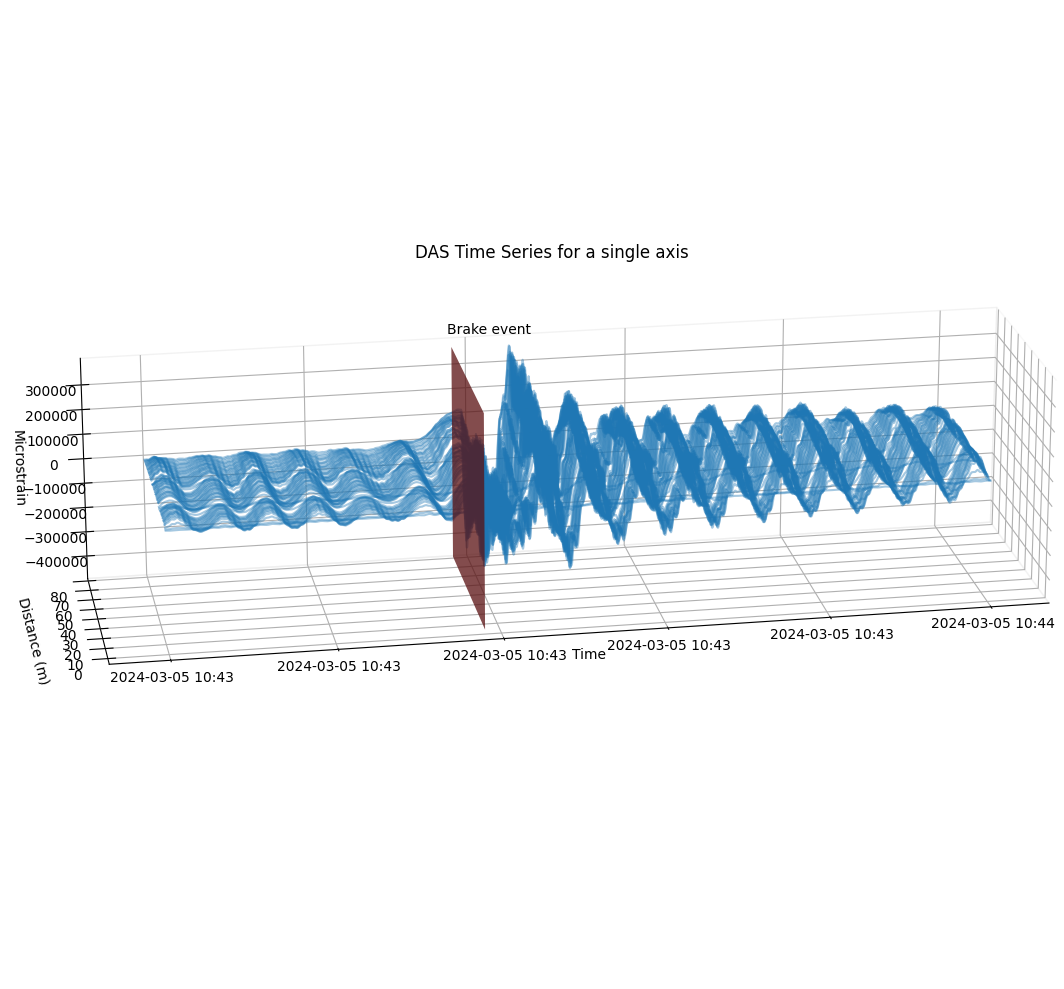

In [40]:
plot_das_time_series_one_axis_3D(directory_to_file=das_dir, 
                     input_file_name=input_file_name, 
                     axis='a', 
                     title='DAS Time Series for a single axis',
                     transparency= 0.4,
                     target_time=['2024-03-05 18:43:10', '2024-03-05 18:44:00'],
                     elev=20,
                     azim=-100,
                     time_marker=['2024-03-05 10:43:29'])

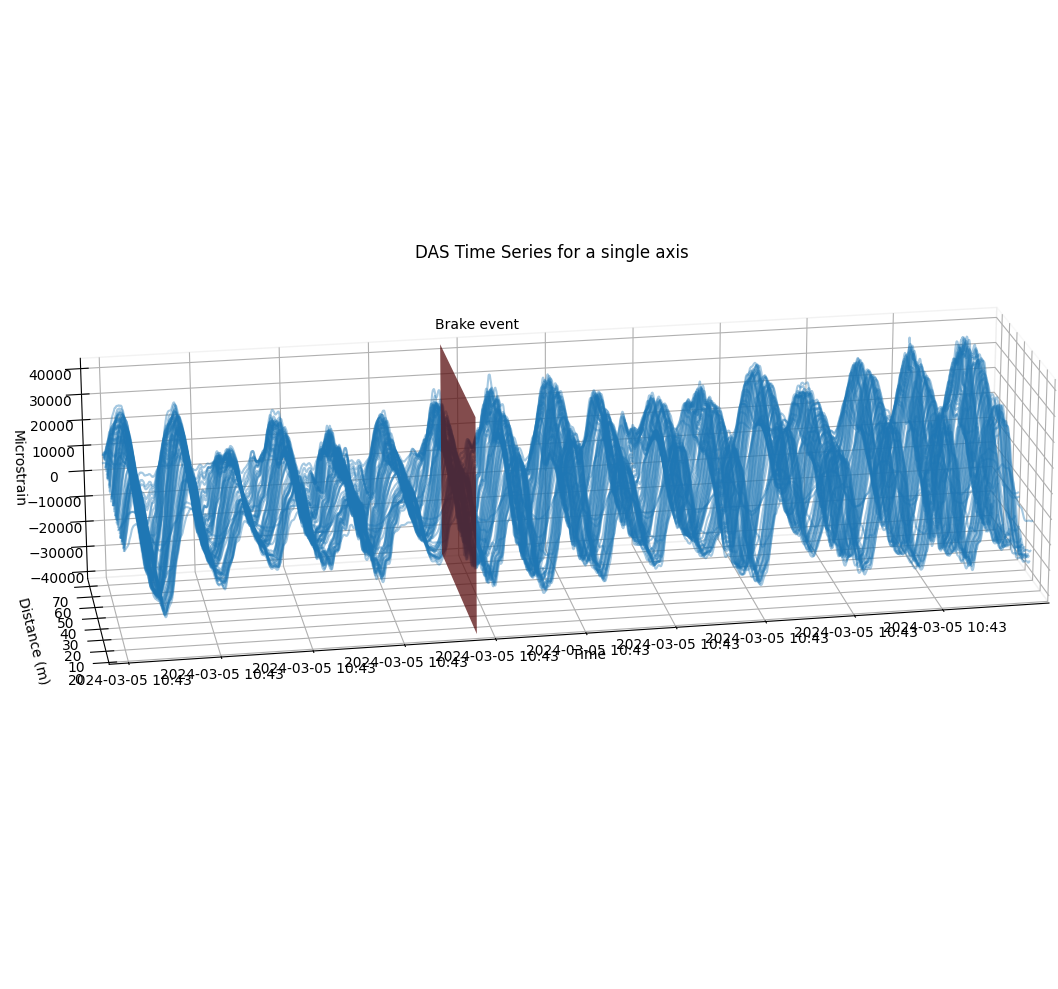

In [45]:
plot_das_time_series_one_axis_3D(directory_to_file=das_dir, 
                     input_file_name=input_file_name, 
                     axis='b', 
                     title='DAS Time Series for a single axis',
                     transparency= 0.4,
                     target_time=['2024-03-05 18:43:10', '2024-03-05 18:44:00'],
                     elev=20,
                     azim=-100,
                     time_marker=['2024-03-05 10:43:29'])

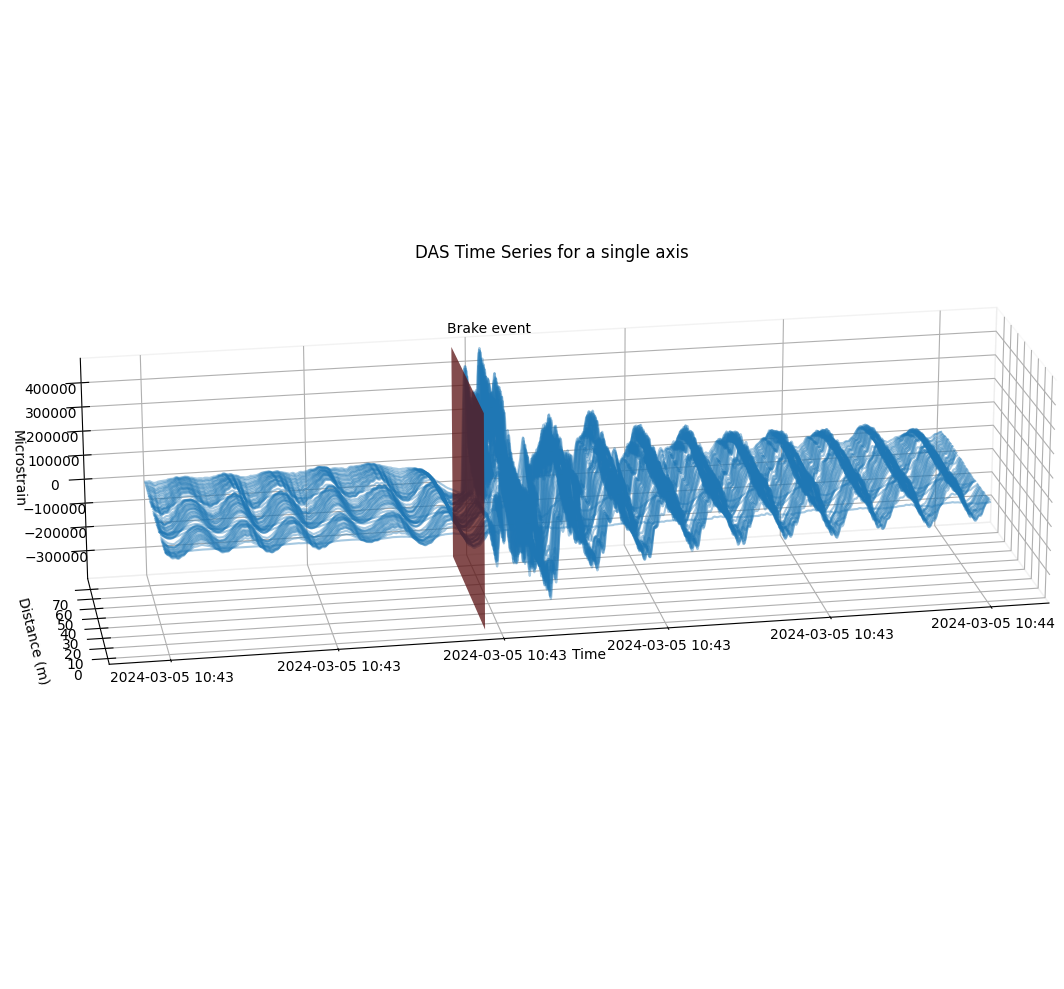

<Figure size 640x480 with 0 Axes>

In [38]:
plot_das_time_series_one_axis_3D(directory_to_file=das_dir, 
                     input_file_name=input_file_name, 
                     axis='c', 
                     title='DAS Time Series for a single axis',
                     transparency= 0.4,
                     target_time=['2024-03-05 18:43:10', '2024-03-05 18:44:00'],
                     elev=20,
                     azim=-100,
                     time_marker=['2024-03-05 10:43:29'])

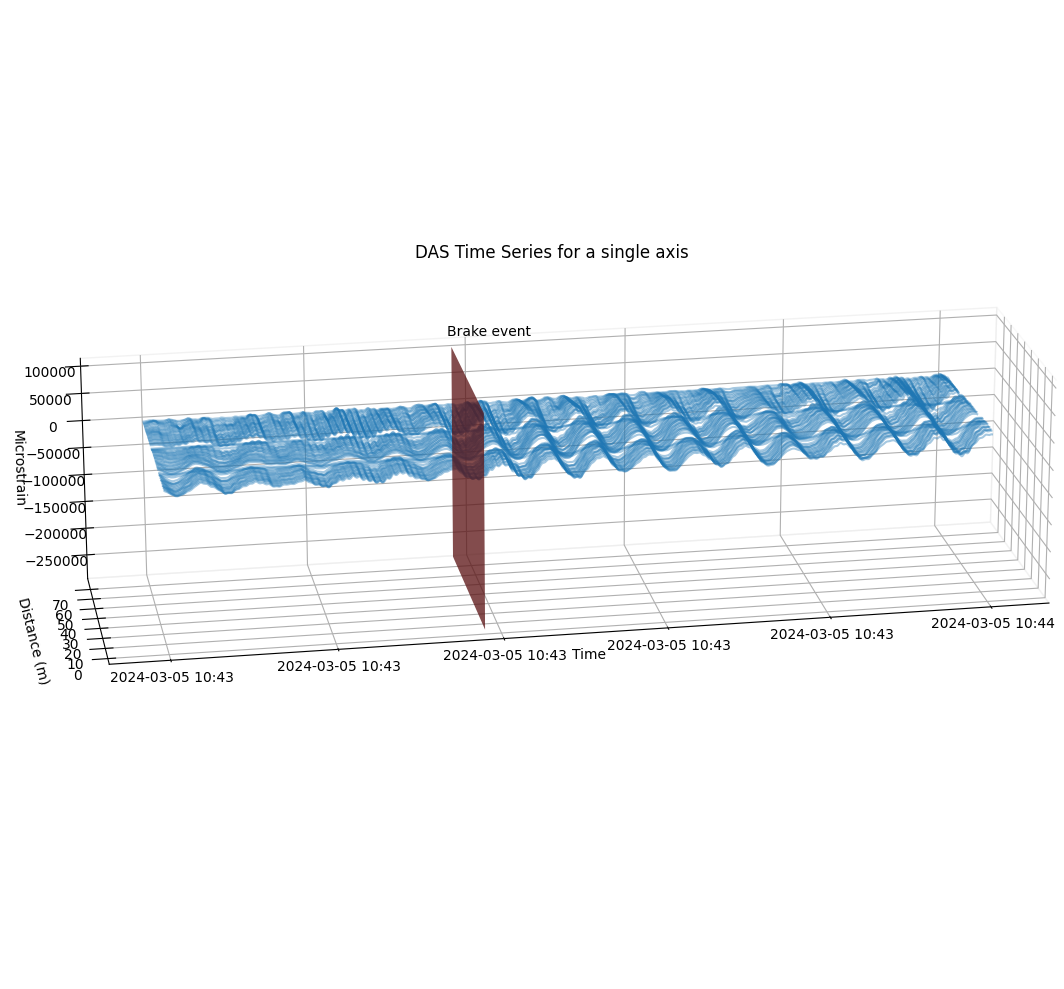

In [41]:
plot_das_time_series_one_axis_3D(directory_to_file=das_dir, 
                     input_file_name=input_file_name, 
                     axis='d', 
                     title='DAS Time Series for a single axis',
                     transparency= 0.4,
                     target_time=['2024-03-05 18:43:10', '2024-03-05 18:44:00'],
                     elev=20,
                     azim=-100,
                     time_marker=['2024-03-05 10:43:29'])

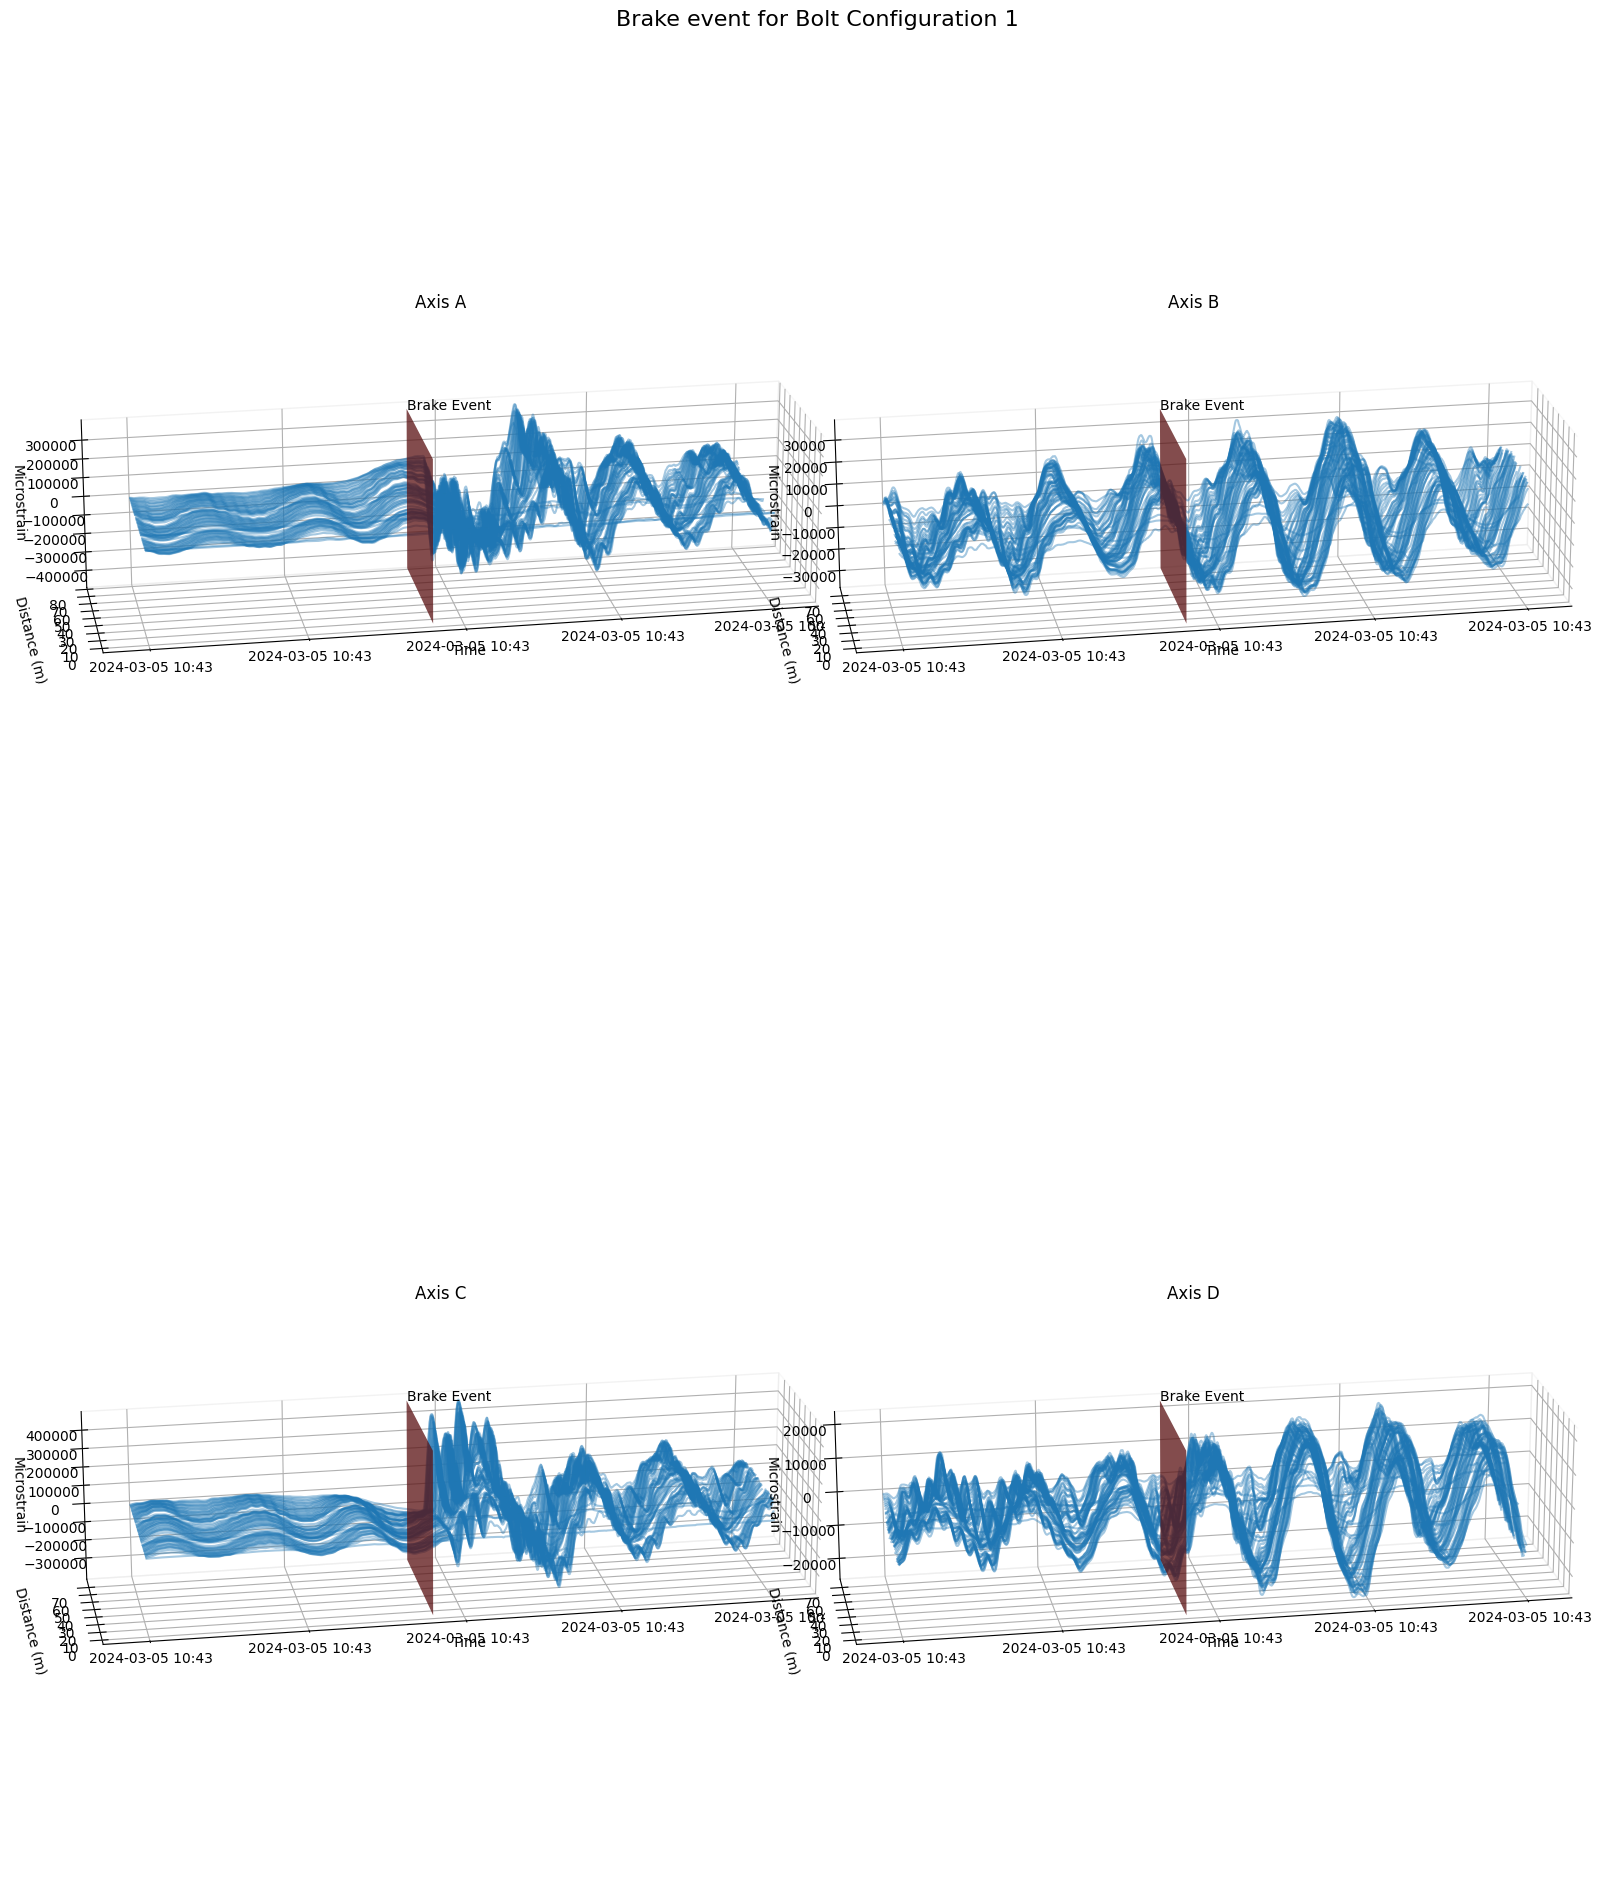

In [77]:
plot_das_time_series_all_axis_3D(directory_to_file=das_dir,
                                 input_file_name=input_file_name,
                                 title='Brake event for Bolt Configuration 1',
                                 transparency=0.4,
                                 target_time=['2024-03-05 18:43:20', '2024-03-05 18:43:50'],
                                 elev=20,
                                 azim=-100,
                                 time_marker=['2024-03-05 10:43:29'],
                                 time_label='Brake Event')